In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('../data/cleaned_data.csv')
df.head()

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,...,PURCHASE_MONTH,PURCHASE_DAY,SHIP_YEAR,SHIP_MONTH,SHIP_DAY,PURCHASE_WEEKDAY,SHIP_WEEKDAY,TIME_TO_SHIP,name,region
0,6eee6248,01109e7002147835,2020-06-20,2020-06-20,Nintendo Switch,8d0d,152.51,website,direct,desktop,...,6,20,2020,6,20,5,5,0,France,Europe
1,e31911a4,040f635a51595929,2020-06-12,2020-06-12,JBL Quantum 100 Gaming Headset,ab0f,24.00,website,direct,desktop,...,6,12,2020,6,12,4,4,0,United States of America,Americas
2,821c1406,0551110c7b755483,2020-03-12,2020-03-13,Sony PlayStation 5 Bundle,54ed,1800.00,website,direct,desktop,...,3,12,2020,3,13,3,4,24,United States of America,Americas
3,0cf75a8d,0d06d15e8c48315,2019-11-22,2019-11-23,27in 4K gaming monitor,891b,312.92,website,direct,desktop,...,11,22,2019,11,23,4,5,24,United States of America,Americas
4,582cc3ee,0f217c65f0a38617,2019-12-09,2019-12-09,JBL Quantum 100 Gaming Headset,ab0f,24.00,website,direct,desktop,...,12,9,2019,12,9,0,0,0,United States of America,Americas


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19717 entries, 0 to 19716
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   USER_ID                  19717 non-null  object 
 1   ORDER_ID                 19717 non-null  object 
 2   PURCHASE_TS              19717 non-null  object 
 3   SHIP_TS                  19717 non-null  object 
 4   PRODUCT_NAME             19717 non-null  object 
 5   PRODUCT_ID               19717 non-null  object 
 6   USD_PRICE                19717 non-null  float64
 7   PURCHASE_PLATFORM        19717 non-null  object 
 8   MARKETING_CHANNEL        19717 non-null  object 
 9   ACCOUNT_CREATION_METHOD  19717 non-null  object 
 10  COUNTRY_CODE             19682 non-null  object 
 11  PURCHASE_YEAR            19717 non-null  int64  
 12  PURCHASE_MONTH           19717 non-null  int64  
 13  PURCHASE_DAY             19717 non-null  int64  
 14  SHIP_YEAR             

In [4]:
df['PURCHASE_TS'] = df['PURCHASE_TS'].astype('datetime64[ns]')
df['SHIP_TS'] = df['SHIP_TS'].astype('datetime64[ns]')

In [5]:
df['PURCHASE_MON_YEAR'] = df['PURCHASE_TS'].dt.to_period('M')

In [6]:
# Create the pivot table
product_sales_pivot = pd.pivot_table(
    df,
    values='USD_PRICE',
    index='PURCHASE_MON_YEAR',
    columns='PRODUCT_NAME',
    aggfunc='sum'
)

In [7]:
# product_sales_pivot.round(2)

styled_pivot = product_sales_pivot.style.background_gradient(cmap='YlGnBu').format('${:,.2f}')
styled_pivot

PRODUCT_NAME,27in 4K gaming monitor,Acer Nitro V Gaming Laptop,Dell Gaming Mouse,JBL Quantum 100 Gaming Headset,Lenovo IdeaPad Gaming 3,Nintendo Switch,Razer Pro Gaming Headset,Sony PlayStation 5 Bundle
PURCHASE_MON_YEAR,,,,,,,,
2019-01,"$33,501.10","$2,298.04",$nan,"$2,894.73","$6,524.52","$38,539.18",$nan,"$16,733.71"
2019-02,"$26,409.22","$1,463.76",$nan,"$1,810.60","$7,548.12","$25,381.51",$nan,"$17,775.89"
2019-03,"$31,669.73","$2,234.40",$nan,"$2,963.36","$11,410.11","$35,465.21",$nan,"$14,870.90"
2019-04,"$45,529.90","$2,126.96",$nan,"$2,961.87","$10,771.68","$34,495.03",$nan,"$15,645.26"
2019-05,"$36,884.62",$nan,$nan,"$2,931.20","$11,576.46","$34,312.68",$nan,"$29,470.73"
2019-06,"$33,926.67","$1,581.28",$nan,"$2,694.64","$11,042.34","$29,508.48",$nan,"$15,096.19"
2019-07,"$44,768.94","$1,537.60",$nan,"$3,251.00","$15,875.57","$37,869.62",$nan,"$14,333.49"
2019-08,"$37,682.96",$648.22,$nan,"$2,821.16","$11,590.91","$43,173.11",$nan,"$17,640.56"
2019-09,"$58,560.52","$1,596.00",$nan,"$3,555.72","$15,336.56","$44,051.20",$nan,"$20,636.89"


In [8]:
# total sales 
total_sales = np.nansum(product_sales_pivot.values)
total_sales
print("Total sales (all products, all periods): $",round(total_sales, 2))

Total sales (all products, all periods): $ 5542945.59


Our total sales from Jan 2019 to Feb 2021 is: $5542945.59

In [9]:
product_totals = product_sales_pivot.sum(axis=0)
print("Total sales per product:")
print(product_totals.round(2))

Total sales per product:
PRODUCT_NAME
27in 4K gaming monitor            1770189.30
Acer Nitro V Gaming Laptop          57790.42
Dell Gaming Mouse                   33427.74
JBL Quantum 100 Gaming Headset      87861.71
Lenovo IdeaPad Gaming 3            661085.48
Nintendo Switch                   1491587.07
Razer Pro Gaming Headset              764.25
Sony PlayStation 5 Bundle         1440239.62
dtype: float64


The most popular products are: 27in 4k gaming monitor, Nintendo Switch and Sony PlayStation 5 bunble.

And the least popular products are Razer Pro Gaming Headset, Dell Gaming Mouse, Acer Nitro laptop.

In [10]:
period_totals = product_sales_pivot.sum(axis=1)
print("Total sales per period:")
print(period_totals.round(2))

Total sales per period:
PURCHASE_MON_YEAR
2019-01    100491.28
2019-02     80389.10
2019-03     98613.71
2019-04    111530.70
2019-05    115175.69
2019-06     93849.60
2019-07    117636.22
2019-08    113556.92
2019-09    143736.89
2019-10    110832.67
2019-11    148621.39
2019-12    165648.76
2020-01     86100.32
2020-02    163038.10
2020-03    269087.52
2020-04    308225.71
2020-05    306634.03
2020-06    295381.85
2020-07    291631.80
2020-08    350444.63
2020-09    408512.49
2020-10    308309.04
2020-11    353058.38
2020-12    496552.10
2021-01    289350.39
2021-02    216536.32
Freq: M, dtype: float64


The month with the least sales was Jan 2020 with $86k and the month with the most sales was Dec 2020 with ~$500k.

In [11]:
product_sales_long = product_sales_pivot.reset_index().melt(
    id_vars='PURCHASE_MON_YEAR',
    var_name='product',
    value_name='sales'
)

# Convert the period back to timestamp for plotting
product_sales_long['PURCHASE_MON_YEAR'] = product_sales_long['PURCHASE_MON_YEAR'].dt.to_timestamp()

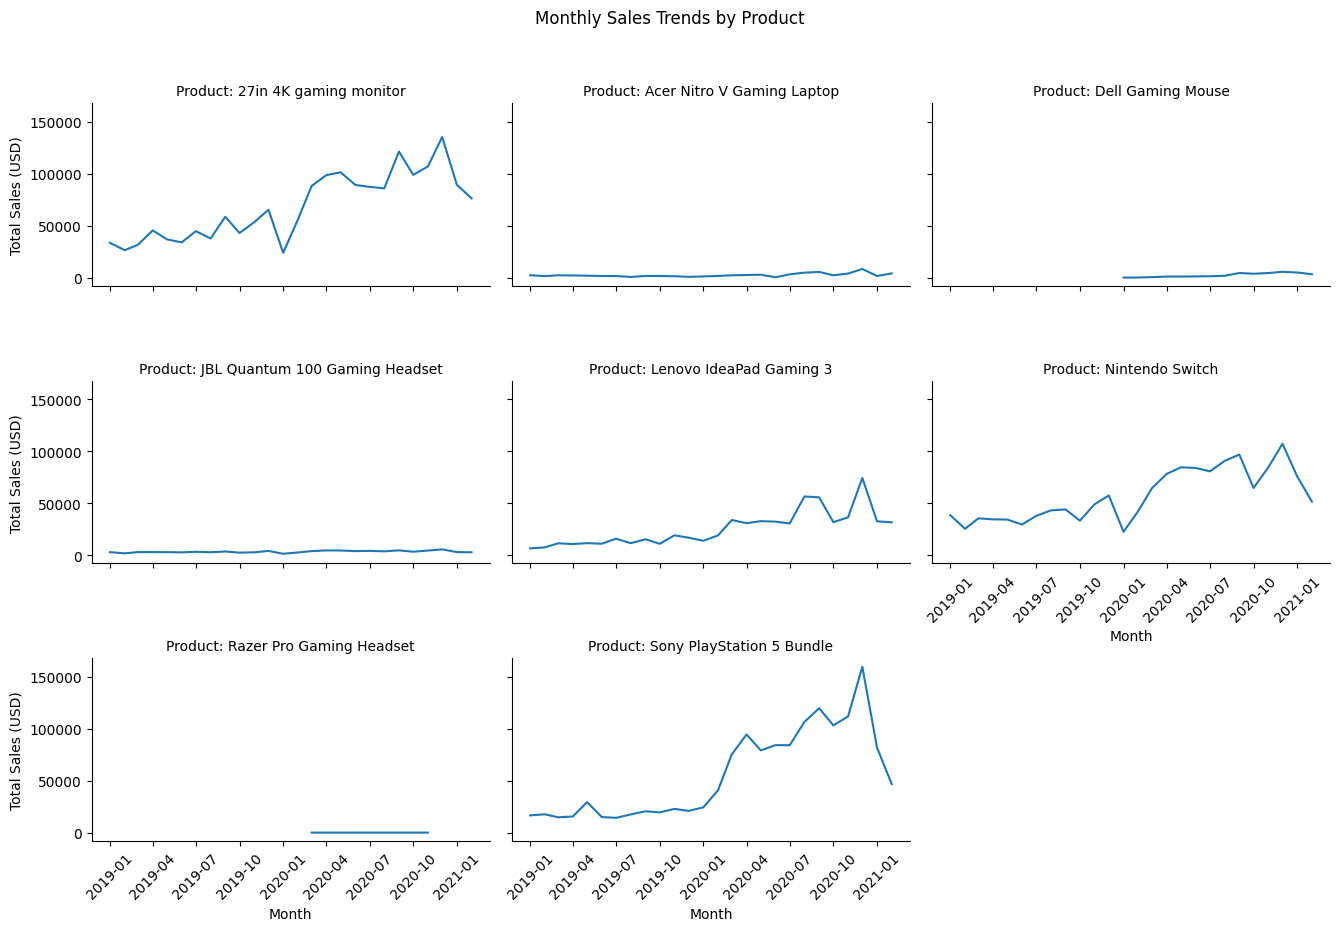

In [12]:
g = sns.relplot(
    data=product_sales_long,
    x='PURCHASE_MON_YEAR',
    y='sales',
    col='product',
    col_wrap=3,
    kind='line',
    height=3,
    aspect=1.5
)

g.figure.suptitle('Monthly Sales Trends by Product', y=1.03)
g.set_axis_labels('Month', 'Total Sales (USD)')
g.set_titles("Product: {col_name}")

for ax in g.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

From the plot, we can see that Razer gaming headset and Dell gaming mouse have a lot of missing data.

We can see a tremendous rise in sales on and from Dec 2019, and this trend can be seen in all the major products.

In [15]:
# Finding the most expensive products
df.groupby('PRODUCT_NAME')['USD_PRICE'].max().sort_values(ascending=False).head(10)

PRODUCT_NAME
Sony PlayStation 5 Bundle         3146.88
Lenovo IdeaPad Gaming 3           1358.48
Acer Nitro V Gaming Laptop         873.58
27in 4K gaming monitor             584.09
Nintendo Switch                    208.89
Razer Pro Gaming Headset           153.22
Dell Gaming Mouse                   77.71
JBL Quantum 100 Gaming Headset      34.86
Name: USD_PRICE, dtype: float64

### Sales Over Time:

In [27]:
monthly_sales = df.groupby([pd.Grouper(key='PURCHASE_TS', freq='ME'), 'PRODUCT_NAME', 'region'])['USD_PRICE'].sum().reset_index()

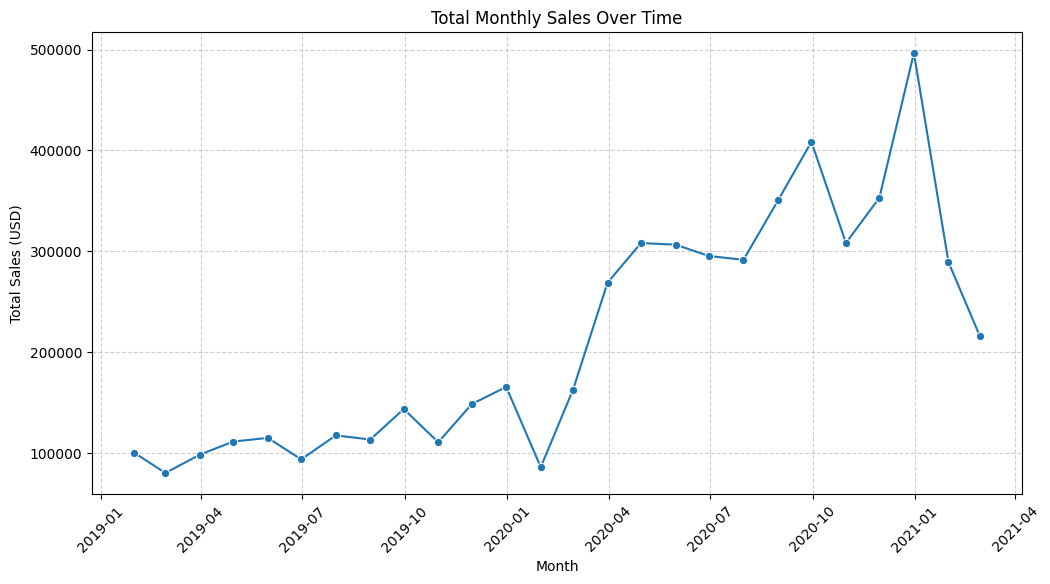

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='PURCHASE_TS', y='USD_PRICE', marker='o')
plt.title('Total Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

The sales increased dramatically from Feb 2020 (early COVID months) to Jan 2021. After than the sales is pummeling at drastic rate.

### Overall Sales sliced by products:

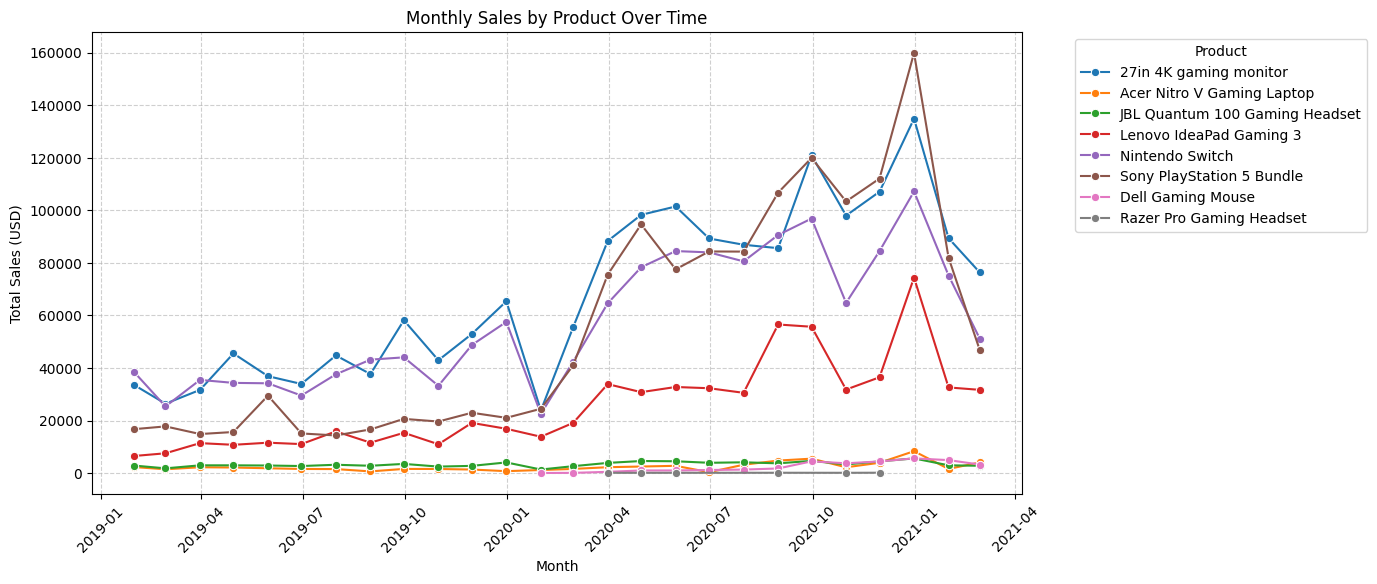

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='PURCHASE_TS', y='USD_PRICE', hue='PRODUCT_NAME', estimator='sum', errorbar=None, marker='o')
plt.title('Monthly Sales by Product Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

We can see that all the major products are showing similar trends as the overall trend. This means that this dramatic rise and fall is a global trend among all the major products.

### Overall sales by Region:

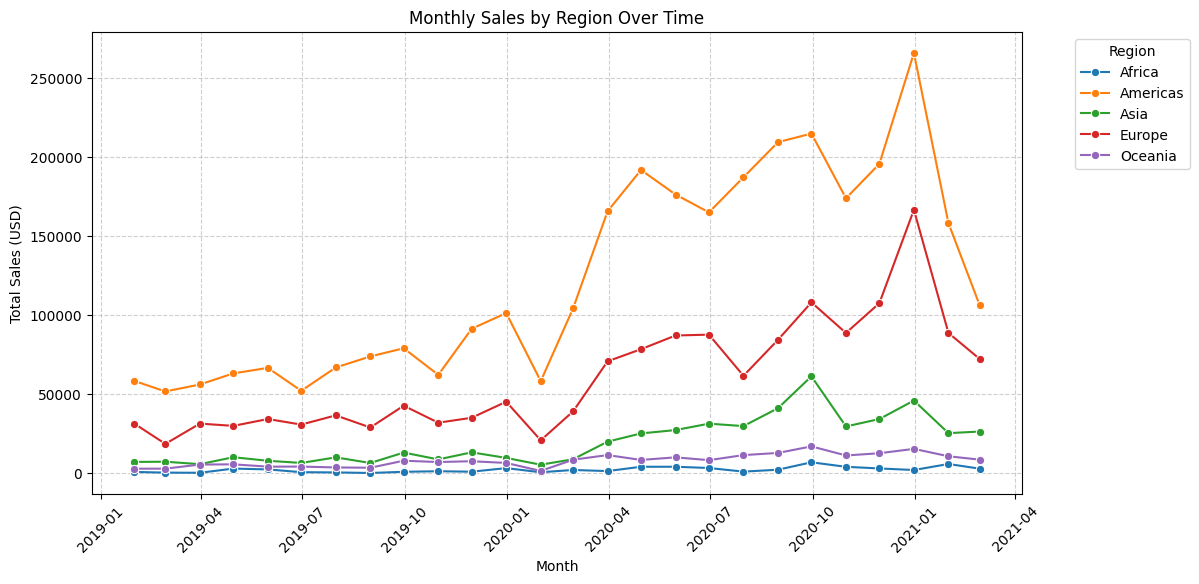

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='PURCHASE_TS', y='USD_PRICE', hue='region', estimator='sum', errorbar=None, marker='o')
plt.title('Monthly Sales by Region Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Not just products, but the regions are showing the same trend as well. Our major regions of sales are Americas and Europe, which tightly follows the sales trend.

## Decomposing the metric:

In [32]:
order_count_by_product = df.groupby([pd.Grouper(key='PURCHASE_TS', freq='ME'), 'PRODUCT_NAME'])['ORDER_ID'].count().reset_index()

### Sales = Order Count * AOV (Average Order Value)

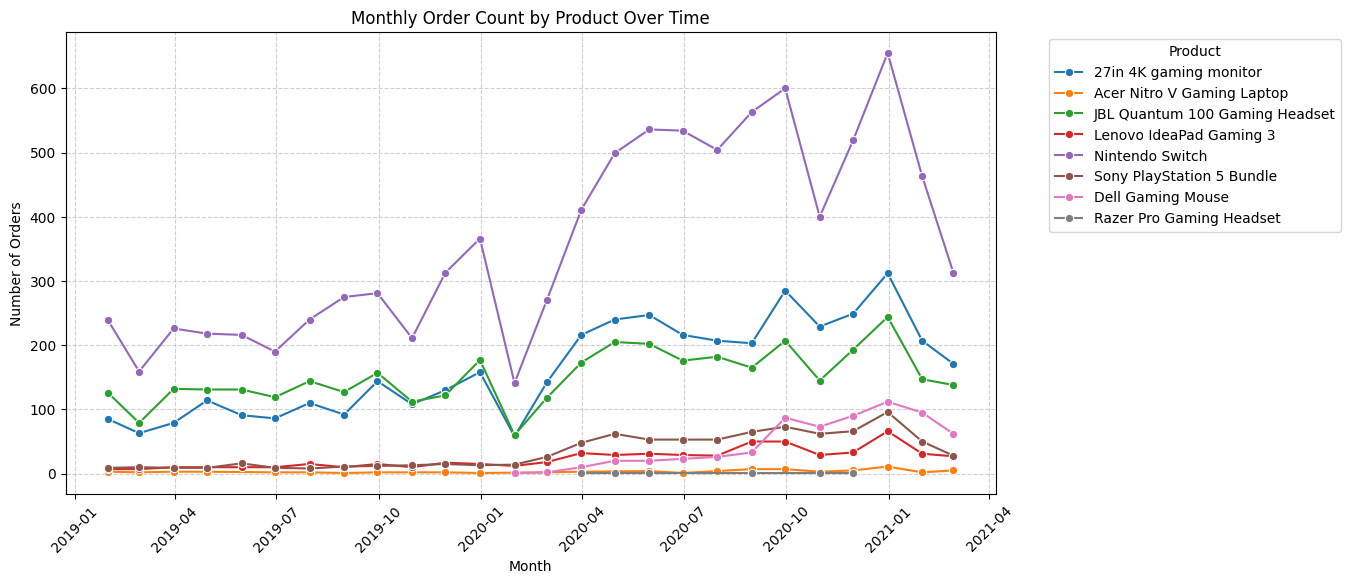

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=order_count_by_product, x='PURCHASE_TS', y='ORDER_ID', hue='PRODUCT_NAME', estimator='sum', errorbar=None, marker='o')
plt.title('Monthly Order Count by Product Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The trend is followed here as well. We can see that Nintendo Switch was very popular, followed by gaming monitor and JBL gaming headset.

### AOV by Product over time:

In [34]:
aov_by_product = df.groupby([pd.Grouper(key='PURCHASE_TS', freq='ME'), 'PRODUCT_NAME'])['USD_PRICE'].mean().reset_index()

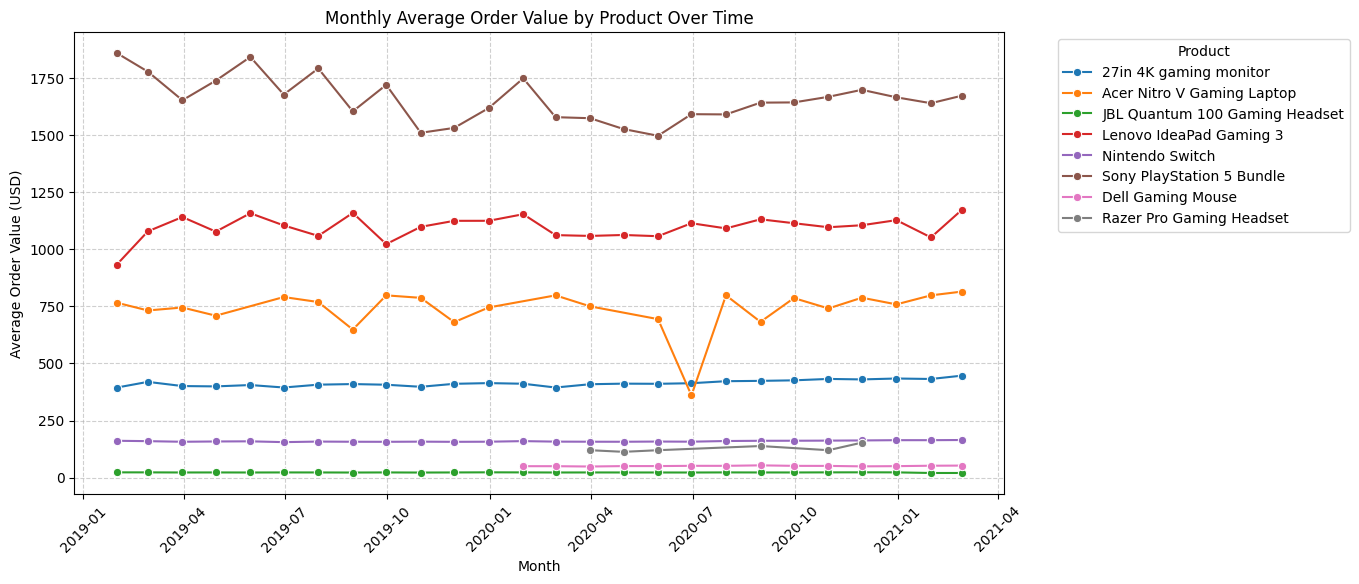

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=aov_by_product, x='PURCHASE_TS', y='USD_PRICE', hue='PRODUCT_NAME', estimator='mean', errorbar=None, marker='o')
plt.title('Monthly Average Order Value by Product Over Time')
plt.xlabel('Month')
plt.ylabel('Average Order Value (USD)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The price of gaming monitor, Nintendo Switch, JBL gaming headset have remained almost constant over time. Whereas, the price of Sony Playstation bundle and Acer gaming laptop have flucuated a lot over the years, specially the price of Acer laptop in Jul 2020 which took a sudden dip and then rose to normal.

## Top Products:

In [36]:
top_products = df.groupby('PRODUCT_NAME')['USD_PRICE'].sum().nlargest(3).index

df_top3 = df[df['PRODUCT_NAME'].isin(top_products)]

### Monthly sales for top 3 products by marketing channels

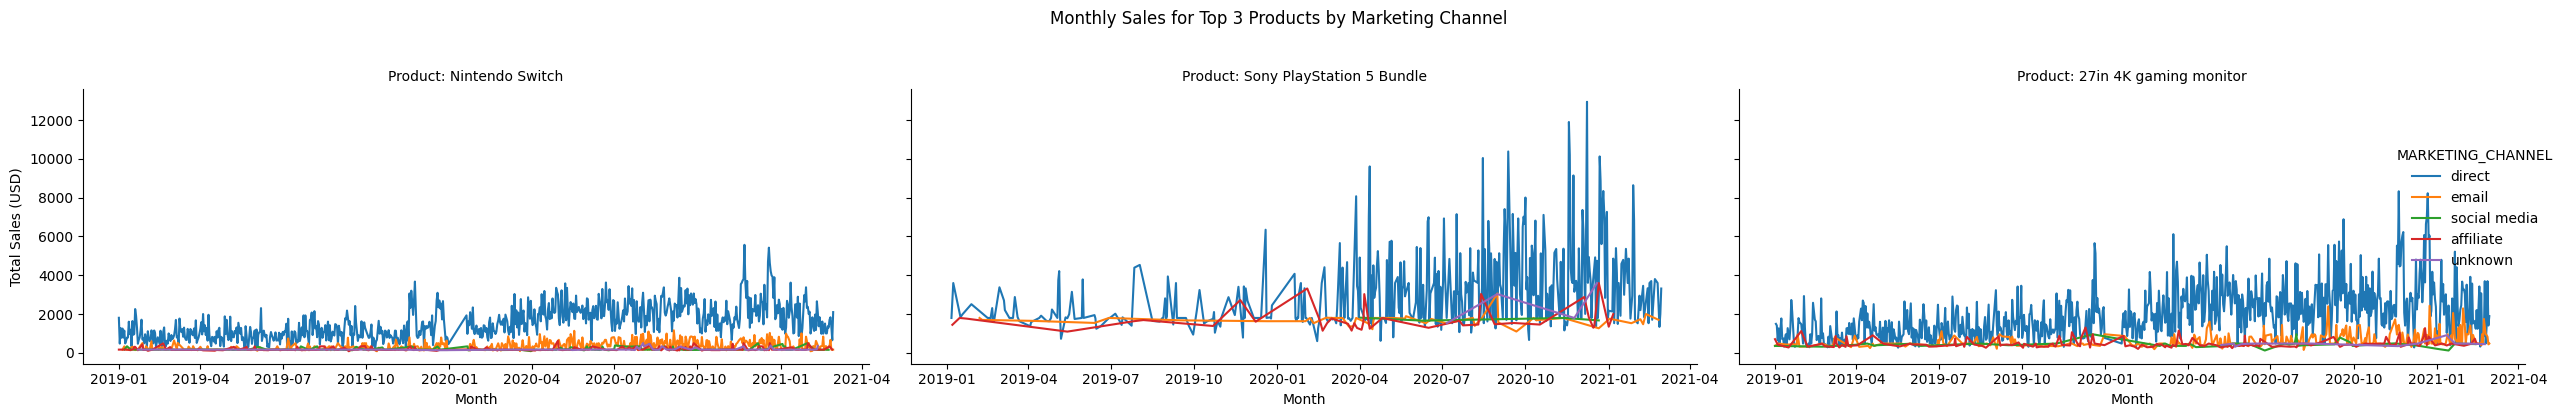

In [40]:
g = sns.relplot(
    data=df_top3,
    x='PURCHASE_TS',
    y='USD_PRICE',
    hue='MARKETING_CHANNEL',
    col='PRODUCT_NAME',
    kind='line',
    estimator='sum',
    errorbar=None,
    height=4,
    aspect=2
)

g.figure.suptitle('Monthly Sales for Top 3 Products by Marketing Channel', y=1.03)
g.set_axis_labels('Month', 'Total Sales (USD)')
g.set_titles("Product: {col_name}")
plt.tight_layout()
plt.show()

We can see that the most dominant channel is direct (Meaning the user directly come and order from the website).

There's a potential of imporving marketing through emails and affiliate to get more sales here.